In [ ]:
!pip install pyLDAvis

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 29.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.6/17.6 MB 111.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 134.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 341.8/341.8 kB 42.2 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.22.4
    Uninstalling numpy-1.22.4:
      Successfully uninstalled numpy-1.22.4
  Attempting uninstall: pandas
    Found existing installation: pandas 1.5.3
    Uninstalling pandas-1.5.3:
      Successfully uninstalled pandas-1.5.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==1.5.3, but you have pandas 2.0.3 which is incompatible.
numba 0.56.4 requires numpy<1.24,>=1.18, but you have numpy 1.25.1 which is incompatible.
tensorflow 2.12.0 

In [ ]:
#local Dataset
# add the dataset to your drive under colab notebooks folder
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
df = pd.read_csv("/content/drive/Tweets.csv")
review_df= df[['text','airline_sentiment']]
print(review_df)


                                                    text airline_sentiment
0                    @VirginAmerica What @dhepburn said.           neutral
1      @VirginAmerica plus you've added commercials t...          positive
2      @VirginAmerica I didn't today... Must mean I n...           neutral
3      @VirginAmerica it's really aggressive to blast...          negative
4      @VirginAmerica and it's a really big bad thing...          negative
...                                                  ...               ...
14635  @AmericanAir thank you we got on a different f...          positive
14636  @AmericanAir leaving over 20 minutes Late Flig...          negative
14637  @AmericanAir Please bring American Airlines to...           neutral
14638  @AmericanAir you have my money, you change my ...          negative
14639  @AmericanAir we have 8 ppl so we need 2 know h...           neutral

[14640 rows x 2 columns]


In [ ]:
review_df = review_df[review_df['airline_sentiment']!= 'neutral']
print(review_df.shape)
review_df.head(5)

(11541, 2)


,text,airline_sentiment
1,@VirginAmerica plus you've added commercials t...,positive
3,@VirginAmerica it's really aggressive to blast...,negative
4,@VirginAmerica and it's a really big bad thing...,negative
5,@VirginAmerica seriously would pay $30 a fligh...,negative
6,"@VirginAmerica yes, nearly every time I fly VX...",positive


In [ ]:
review_df['airline_sentiment'].value_counts()

airline_sentiment
negative    9178
positive    2363
Name: count, dtype: int64

In [ ]:
sentiment_label=review_df.airline_sentiment.factorize()
sentiment_label

(array([0, 1, 1, ..., 0, 1, 1]),
 Index(['positive', 'negative'], dtype='object'))

In [ ]:
tweet = review_df.text.values
tweet

array(["@VirginAmerica plus you've added commercials to the experience... tacky.",
       '@VirginAmerica it\'s really aggressive to blast obnoxious "entertainment" in your guests\' faces &amp; they have little recourse',
       "@VirginAmerica and it's a really big bad thing about it", ...,
       '@AmericanAir thank you we got on a different flight to Chicago.',
       "@AmericanAir leaving over 20 minutes Late Flight. No warnings or communication until we were 15 minutes Late Flight. That's called shitty customer svc",
       "@AmericanAir you have my money, you change my flight, and don't answer your phones! Any other suggestions so I can make my commitment??"],
      dtype=object)

In [ ]:
#tokenisation
from tensorflow.keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer(num_words = 5000)
tokenizer.fit_on_texts(tweet)

In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
encoded_dict = tokenizer.texts_to_sequences(tweet)
print(encoded_dict)
padded_sequence = pad_sequences(encoded_dict, maxlen=200)
print(padded_sequence)

[[103, 575, 530, 1287, 2416, 1, 2, 177], [103, 88, 124, 3255, 1, 4076, 4077, 957, 15, 20, 4078, 58, 56, 25, 482, 2417], [103, 9, 88, 4, 124, 439, 196, 483, 86, 21], [103, 388, 83, 281, 219, 4, 8, 7, 205, 28, 198, 25, 29, 2167, 88, 124, 2, 122, 196, 483, 86, 151, 1977], [103, 184, 1348, 297, 49, 3, 114, 2418, 29, 1978, 150, 450], [103, 233, 3, 35, 3, 54, 1225], [103, 21, 22, 337, 9, 521, 40, 77, 347, 231, 174, 138, 1, 19], [103, 3, 710, 97, 650, 44, 172, 203, 154, 1225], [103, 29, 14, 543, 4, 110, 669, 226, 1603, 86, 11, 636, 207, 1, 58, 3, 365, 126, 864, 10, 11, 406, 207, 252, 1705], [103, 60, 151, 20, 1825, 1510, 96, 112, 160, 62, 2, 1706, 450, 39, 197, 53, 47, 50], [103, 34], [103, 317, 1511, 958, 14, 66, 711], [103, 44, 879, 7, 11, 166, 1288, 844, 8, 291, 1, 682, 118, 552, 229, 31, 110, 494, 86, 1103, 1422], [103, 3, 615, 39, 484, 1, 317, 132, 305, 9, 348, 2168, 459, 15, 11, 155, 163, 1, 186, 1604, 4079, 10, 712, 1423, 17, 19, 46], [3, 1512, 151, 103], [103, 6, 139, 69, 83, 32, 4080

In [ ]:
#implementation of lstm
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, SpatialDropout1D
from tensorflow.keras.layers import Embedding
embedding_vector_length = 32
vocab_size = len(tokenizer.word_index)+1
model = Sequential()
model.add(Embedding(vocab_size, embedding_vector_length, input_length=200))
model.add(SpatialDropout1D(0.25))
model.add(LSTM(50, dropout=0.5, recurrent_dropout=0.5))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))
print(model.summary())
model.compile(loss='binary_crossentropy',optimizer='adam', metrics=['accuracy'])


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 200, 32)           423488    
                                                                 
 spatial_dropout1d (SpatialD  (None, 200, 32)          0         
 ropout1D)                                                       
                                                                 
 lstm (LSTM)                 (None, 50)                16600     
                                                                 
 dropout (Dropout)           (None, 50)                0         
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 440,139
Trainable params: 440,139
Non-trainable params: 0
__________________________________________________

In [ ]:
history = model.fit(padded_sequence, sentiment_label[0],validation_split=0.2, epochs= 5, batch_size=32)

Epoch 1/5
289/289 [==============================] - 57s 186ms/step - loss: 0.3975 - accuracy: 0.8323 - val_loss: 0.2165 - val_accuracy: 0.9173
Epoch 2/5
289/289 [==============================] - 57s 197ms/step - loss: 0.2219 - accuracy: 0.9150 - val_loss: 0.1700 - val_accuracy: 0.9333
Epoch 3/5
289/289 [==============================] - 53s 185ms/step - loss: 0.1658 - accuracy: 0.9399 - val_loss: 0.1625 - val_accuracy: 0.9389
Epoch 4/5
289/289 [==============================] - 57s 199ms/step - loss: 0.1351 - accuracy: 0.9505 - val_loss: 0.1666 - val_accuracy: 0.9420
Epoch 5/5
289/289 [==============================] - 55s 190ms/step - loss: 0.1154 - accuracy: 0.9573 - val_loss: 0.1748 - val_accuracy: 0.9441


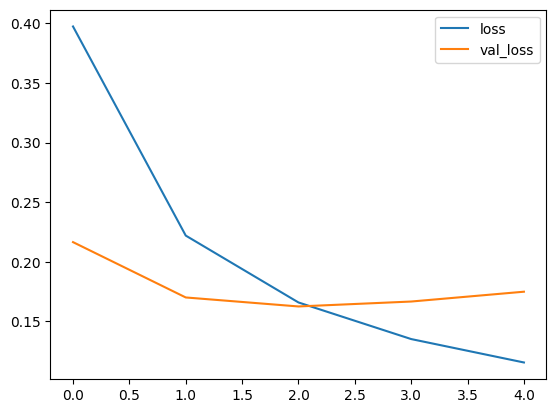

<Figure size 640x480 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'],label='loss')
plt.plot(history.history['val_loss'],label='val_loss')

plt.legend()
plt.show()

plt.savefig("Loss_plt.jpg")

In [ ]:
def predict_sentiment(text):
  tw = tokenizer.texts_to_sequences([text])
  tw = pad_sequences(tw,maxlen=200)
  prediction = int(model.predict(tw).round().item())
  print("Predicted label: ", sentiment_label[1][prediction])

test_sentence1 = "I enjoyed my journey on this flight"
predict_sentiment(test_sentence1)
test_sentence2 = "This sis the worst flight experience of my life"
predict_sentiment(test_sentence2)

1/1 [==============================] - 1s 516ms/step
Predicted label:  positive
1/1 [==============================] - 0s 90ms/step
Predicted label:  negative


In [ ]:
#topic modelling
import zipfile
import pandas as pd
import os
papers = pd.read_csv("papers.csv")
print(papers.shape)
papers.head()

(6560, 7)


,id,year,title,event_type,pdf_name,abstract,paper_text
0,1,1987,Self-Organization of Associative Database and ...,NaN,1-self-organization-of-associative-database-an...,Abstract Missing,767\n\nSELF-ORGANIZATION OF ASSOCIATIVE DATABA...
1,10,1987,A Mean Field Theory of Layer IV of Visual Cort...,NaN,10-a-mean-field-theory-of-layer-iv-of-visual-c...,Abstract Missing,683\n\nA MEAN FIELD THEORY OF LAYER IV OF VISU...
2,100,1988,Storing Covariance by the Associative Long-Ter...,NaN,100-storing-covariance-by-the-associative-long...,Abstract Missing,394\n\nSTORING COVARIANCE BY THE ASSOCIATIVE\n...
3,1000,1994,Bayesian Query Construction for Neural Network...,NaN,1000-bayesian-query-construction-for-neural-ne...,Abstract Missing,Bayesian Query Construction for Neural\nNetwor...
4,1001,1994,"Neural Network Ensembles, Cross Validation, an...",NaN,1001-neural-network-ensembles-cross-validation...,Abstract Missing,"Neural Network Ensembles, Cross\nValidation, a..."


In [ ]:
papers = papers.drop(columns=['id', 'event_type', 'pdf_name'], axis=1).sample(100)
papers.head()

,year,title,abstract,paper_text
3445,1990,Computing with Arrays of Bell-Shaped and Sigmo...,Abstract Missing,Computing with Arrays of Bell-Shaped and\nSigm...
2385,2007,Efficient Principled Learning of Thin Junction...,We present the first truly polynomial algorith...,Efficient Principled Learning of Thin Junction...
5653,2016,Linear-Memory and Decomposition-Invariant Line...,"Recently, several works have shown that natura...",Linear-Memory and Decomposition-Invariant\nLin...
4380,2013,Projecting Ising Model Parameters for Fast Mixing,Inference in general Ising models is difficult...,Projecting Ising Model Parameters for Fast Mix...
6198,1992,Forecasting Demand for Electric Power,Abstract Missing,Forecasting Demand for Electric Power\n\nJen-L...


In [ ]:
import re
papers['paper_text_processed'] = papers['paper_text'].map(lambda x: re.sub('[,\.!,?]', '', x))
papers['paper_text_processed'] = papers['paper_text_processed'].map(lambda x: x.lower())
papers['paper_text_processed'].head()


3445    computing with arrays of bell-shaped and\nsigm...
2385    efficient principled learning of thin junction...
5653    linear-memory and decomposition-invariant\nlin...
4380    projecting ising model parameters for fast mix...
6198    forecasting demand for electric power\n\njen-l...
Name: paper_text_processed, dtype: object

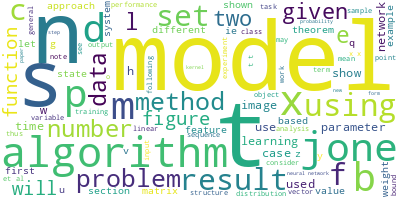

In [ ]:
from wordcloud import WordCloud
long_string = '.'.join(list(papers['paper_text_processed'].values))
wordcloud = WordCloud(background_color="white", max_words = 100, contour_width=3, contour_color= 'steelblue')
wordcloud.generate(long_string)
wordcloud.to_image()

In [ ]:
#text cleaning
import gensim
from gensim.utils import simple_preprocess
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words=stopwords.words('english')
stop_words.extend(['from','subject','re','edu','use'])
def sent_to_words(sentences):
  for sentence in sentences:
    yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))

def remove_stopwords(texts):
  return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]
data = papers.paper_text_processed.values.tolist()
data_words = list(sent_to_words(data))
data_words = remove_stopwords(data_words)
print(data_words[:1][0][:30])

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['computing', 'arrays', 'bell', 'shaped', 'sigmoid', 'functions', 'pierre', 'baldi', 'jet', 'propulsion', 'laboratory', 'california', 'institute', 'technology', 'pasadena', 'ca', 'abstract', 'consider', 'feed', 'forward', 'neural', 'networks', 'one', 'non', 'linear', 'hidden', 'layer', 'linear', 'output', 'units']


In [ ]:
import gensim.corpora as corpora
id2word = corpora.Dictionary(data_words)
texts = data_words
corpus = [id2word.doc2bow(text) for text in texts]
print(corpus[:1][0][:30])

[(0, 1), (1, 1), (2, 1), (3, 3), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 6), (11, 1), (12, 1), (13, 7), (14, 1), (15, 3), (16, 1), (17, 2), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 2), (25, 2), (26, 3), (27, 1), (28, 1), (29, 3)]


In [ ]:
from pprint import pprint
num_topics = 10
lda_model = gensim.models.LdaMulticore(corpus=corpus, id2word=id2word, num_topics=num_topics)
pprint(lda_model.print_topics())
doc_lda= lda_model[corpus]

[(0,
  '0.006*"model" + 0.006*"learning" + 0.005*"data" + 0.004*"algorithm" + '
  '0.004*"set" + 0.003*"one" + 0.003*"using" + 0.003*"function" + 0.003*"time" '
  '+ 0.003*"two"'),
 (1,
  '0.007*"model" + 0.005*"data" + 0.005*"learning" + 0.005*"algorithm" + '
  '0.004*"time" + 0.004*"function" + 0.003*"problem" + 0.003*"linear" + '
  '0.003*"set" + 0.003*"number"'),
 (2,
  '0.007*"model" + 0.005*"data" + 0.005*"learning" + 0.004*"set" + 0.004*"one" '
  '+ 0.004*"function" + 0.004*"using" + 0.003*"number" + 0.003*"time" + '
  '0.003*"problem"'),
 (3,
  '0.007*"learning" + 0.005*"model" + 0.005*"algorithm" + 0.004*"set" + '
  '0.004*"one" + 0.004*"data" + 0.004*"function" + 0.004*"linear" + '
  '0.004*"using" + 0.004*"time"'),
 (4,
  '0.006*"model" + 0.005*"learning" + 0.004*"time" + 0.004*"algorithm" + '
  '0.004*"set" + 0.004*"data" + 0.004*"one" + 0.004*"using" + 0.004*"two" + '
  '0.003*"figure"'),
 (5,
  '0.006*"model" + 0.005*"data" + 0.005*"learning" + 0.004*"function" + '
  '0.0